In [1]:
#!touch 0-convolve_grayscale_valid.py
!chmod +x *.py

(50000, 28, 28)
(50000, 28, 28)


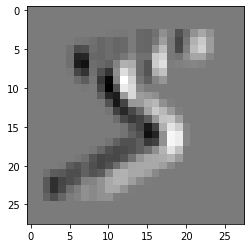

In [3]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid
def convolve_grayscale_valid(images, kernel):
    """ doc """
    kh = kernel.shape[0]
    kw = kernel.shape[1]
    output = np.zeros_like(images)
    for i in range(images.shape[1]):
        if i < images.shape[1] - kh:
            image = images[i]
            for j in range(images.shape[2]):
                if j <= images.shape[2] - kw:
                    output[:, i, j] = np.tensordot(images[:,
                                                          i:i+kh,
                                                          j:j+kw],
                                                   kernel)
    return output

"""for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()"""
if __name__ == '__main__':

    dataset = np.load('../../supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_valid(images, kernel)
    #print(images_conv)
    print(images_conv.shape)

    #plt.imshow(images[0], cmap='gray')
    #plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()

In [38]:
ar = [
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ],
        [
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
            [1,3,6,9],
        ]
    ]
import numpy as np
arr = np.array(ar)
arr.shape
k = [
    [1,2,3],
    [1,2,3],
    [1,2,3],
]
for i in range(arr.shape[0]):
    g = arr[i]
    print(g[i:i+3, i:i+3]*k)

[[ 1  6 18]
 [ 1  6 18]
 [ 1  6 18]]
[[ 3 12 27]
 [ 3 12 27]
 [ 3 12 27]]


In [ ]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#convolve_grayscale_valid = __import__('0-convolve_grayscale_valid').convolve_grayscale_valid
def convolve_grayscale_valid(images, kernel):
    """ doc """
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    
    conv = []
    
    for i in range(images.shape[0]):
        image = images[i]
        # convolution output
        output = np.zeros_like(image)

        # Add zero padding to the input image
        image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
        image_padded[1:-1, 1:-1] = image
        # Loop over every pixel of the image
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                ng = image_padded[y: y+3, x: x+3]
                # if ng.shape == kernel.shape:
                # element-wise multiplication of the kernel and the image
                output[x, y] = (kernel * ng).sum()
        conv.append(output)
    print("yes")
    return np.array(conv)

"""for k in range(ng.shape[0]):
                convolve[i, j] = (kernel * images[j:j+3, j:j+3]).sum()"""
if __name__ == '__main__':

    dataset = np.load('hb/holbertonschool-machine_learning/supervised_learning/data/MNIST.npz')
    images = dataset['X_train']
    print(images.shape)
    kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
    images_conv = convolve_grayscale_valid(images, kernel)
    #print(images_conv)
    print(images_conv.shape)

    #plt.imshow(images[0], cmap='gray')
    #plt.show()
    plt.imshow(images_conv[0], cmap='gray')
    plt.show()


In [ ]:
ED3710
ED3710